# Sentiment Analysis
## On my honor, as a student, I have neither given nor received unauthorized aid on this academic work.

## Wyatt Prall

In [1]:
import nltk
# stopwords, FreqDist, word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from pattern.en import sentiment
import numpy as np
from os import path
from PIL import Image
from textblob import TextBlob
from collections import Counter
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
#regular expression
import re
#csv
import csv
# Excel-like format
import pandas as pd
#data visualization
import matplotlib.pyplot as plt
% matplotlib inline

# The Basics of Sentiment Analysis

## Basics What is Sentiment Analysis?
### Sentiment analysis will take the words in a sentence and apply a score to them to view if they are positive or negative sentence.

### To begin let us start with a small sample size below is six sentences .

In [2]:
movie = ["I had a terrible time at the movies.",
           "This was the best popcorn I have ever tasted.",
           "The view was amazing but the popcorn was cold and had too much butter.",
           "The sound was poor and the lighting was very bad.",
           "I love this place, everytime I come here I sit in the same chair and it is always amazing",
           "The food was good but the waiter was very rude."]
# The reviews consist of some posotive reviews some negative reviews and some that are neutral

## For a human it is easy to categorize these sentences but what if there are more than six when will it become too much of a hassle? That is the point when sentiment analysis will be helpful.

### To perform sentiment analysis we require a Lexicon or a list of positive and negative words

In [3]:
Positive_words = ['best','amazing','love','good']
Negative_words = ['terrible','cold','undercooked','poor','bad','rude']
# This will be the lexicon for the simple analysis

## A lexicon can be as long or as short as you desire. With this trick any word can be analyzed and broken into categories. Now let us do some cleaning before we perform the sentiment analysis.

In [4]:
documents = [re.sub("[^a-zA-Z]+", " ", document) for document in movie]
texts = [[word for word in document.lower().split() ] for document in documents]
texts
# for the documents we are using regular expression to remove everything that is not a letter
# Next for texts we are breaking up the sentences into words.

[['i', 'had', 'a', 'terrible', 'time', 'at', 'the', 'movies'],
 ['this', 'was', 'the', 'best', 'popcorn', 'i', 'have', 'ever', 'tasted'],
 ['the',
  'view',
  'was',
  'amazing',
  'but',
  'the',
  'popcorn',
  'was',
  'cold',
  'and',
  'had',
  'too',
  'much',
  'butter'],
 ['the',
  'sound',
  'was',
  'poor',
  'and',
  'the',
  'lighting',
  'was',
  'very',
  'bad'],
 ['i',
  'love',
  'this',
  'place',
  'everytime',
  'i',
  'come',
  'here',
  'i',
  'sit',
  'in',
  'the',
  'same',
  'chair',
  'and',
  'it',
  'is',
  'always',
  'amazing'],
 ['the', 'food', 'was', 'good', 'but', 'the', 'waiter', 'was', 'very', 'rude']]

In [5]:
for sentence in texts:  
    positive = 0
    negative = 0
    for word in sentence:
        if word in Positive_words:
            positive += 1
        elif word in Negative_words:
            negative += 1
    print positive, negative
#This will read through all of the sentences and categorize the words into either positive or negative 

0 1
1 0
1 1
0 2
2 0
1 1


## With this for loop the six sentences are being assigned by how many positive and negative words there are. Such as review one has one negative word and review three has one positive and one negative word.

In [6]:
for sentence in texts: 
    positive = 0
    negative = 0
    for word in sentence:
        if word in Positive_words:
            positive += 1
        elif word in Negative_words:
            negative += 1
    print positive, negative, positive-negative, "Positive" if positive-negative > 0 else "Neutral" if positive-negative == 0 else "Negative"
    # This will take the sentence and assign a positive or a negative or neutral rating to the sentence

0 1 -1 Negative
1 0 1 Positive
1 1 0 Neutral
0 2 -2 Negative
2 0 2 Positive
1 1 0 Neutral


In [7]:
#positive_words = open(".txt", "rb").read().splitlines()
#negative_words = open(".txt", "rb").read().splitlines()
## With this code you can use any text file that thas words in it to be your lexicon and it is easily added to or removed

## If time is not a factor these lexicons can be saved and used at a later data. A benefit with creating your own lexicon is that it is easily customizable, and you can know exactly how the words are being analyzed. However, creating a personal lexicon will take time. If you do not have the time or the knowledge to create a lexicon there are packages that have pre-built lexicons that will help speed along the process.

# Packages 

In [8]:
#Reading the file into a list format without the extra bracket
review = [] # housing the reviews of the csv file into review
openfile = open('data\sample_restaurant_reviews.csv', 'rb')
r = csv.reader(openfile)
for i in r:
    review.append(i[0])    
openfile.close()

print review[:1]
# Showing only the first review to ensure that it is in correctly

['Lousy Italian food with extremely poor service.\', "Don\'t bother- better places to go.']


In [9]:
len(review)

37

## The sample_restaurant_reviews contains 37 reviews of varying length to show how the analysis is performed with the different packages.

# Bing Liu
## Bing Liu is a lexicon that has a list of positive and negative words.

In [10]:
documents = [re.sub("[^a-zA-Z]+", " ", document) for document in review]
# tokenize
texts = [[word for word in document.lower().split() ] for document in documents]

#Bing-Liu lexicon (positive word list & negative word list)
positive_words = open("data/positive-words.txt", "rb").read().splitlines()
negative_words = open("data/negative-words.txt", "rb").read().splitlines()

for sentence in texts:
    positiveb = 0
    negativeb = 0
    for word in sentence:
        if word in positive_words:
            positiveb += 1
        elif word in negative_words:
            negativeb += 1
    print positiveb, negativeb,positiveb-negativeb, "Positive" if positiveb-negativeb > 0 else "Neutral" if positiveb-negativeb == 0 else "Negative"
# classifying the setences into the theree categories positive negative and neutral

1 3 -2 Negative
11 13 -2 Negative
10 12 -2 Negative
6 6 0 Neutral
8 10 -2 Negative
5 7 -2 Negative
0 3 -3 Negative
11 17 -6 Negative
9 7 2 Positive
12 4 8 Positive
3 0 3 Positive
10 3 7 Positive
1 0 1 Positive
25 5 20 Positive
13 0 13 Positive
14 0 14 Positive
9 1 8 Positive
19 7 12 Positive
2 0 2 Positive
1 0 1 Positive
36 4 32 Positive
12 3 9 Positive
12 1 11 Positive
7 1 6 Positive
7 0 7 Positive
5 1 4 Positive
8 2 6 Positive
6 2 4 Positive
5 0 5 Positive
9 2 7 Positive
22 6 16 Positive
4 0 4 Positive
4 0 4 Positive
4 2 2 Positive
5 0 5 Positive
3 2 1 Positive
2 1 1 Positive


## As you can see with Bing Liu is a lexicon it consists of two txt files one that contains positive words and negative words. These files can easily be changed to add or remove words for customization. There are also other lexicons that can be downloaded or perhaps you wish to use your own as was shown before in the previous section of the tutorial. 

In [11]:
# Putting the reviews into positive negative or neutral category
positive_reviewb = []
negative_reviewb = []
neutral_reviewb = []

for sentence in texts:
    positive = 0
    negative = 0
    for word in sentence:
        if word in positive_words:
            positive += 1
        elif word in negative_words:
            negative += 1
    if positive-negative > 0:
        positive_reviewb.append(sentence)
    elif positive-negative == 0:
        neutral_reviewb.append(sentence)
    else:
        negative_reviewb.append(sentence)
# This will be used to categorize each of the reviews into either positive negative or neutral

### With this code above it is easy store the reviews into positive negative or neutral lists.

In [12]:
p = 'Positive'
N= 'Negative' 
n= 'Neutral'
# These will be used for labeling throughout the tutorial for clarification

In [13]:
print len(positive_reviewb) , p
print len(negative_reviewb), N
print len(neutral_reviewb) ,n
#Showing the number of positive negative or neutral reviews for Bing Liu

29 Positive
7 Negative
1 Neutral


### Since there is only one neutral review let us view it.

In [14]:
neutral_reviewb
# displaying the neutral review

[['i',
  'don',
  't',
  'get',
  'it',
  'i',
  'just',
  'don',
  't',
  'get',
  'it',
  'xa',
  'my',
  'exasperation',
  'with',
  'the',
  'restaurant',
  'compounds',
  'by',
  'the',
  'minute',
  'xa',
  'so',
  'this',
  'was',
  'my',
  'third',
  'and',
  'final',
  'visit',
  'and',
  'i',
  'will',
  'never',
  'go',
  'back',
  'xa',
  'the',
  'experience',
  'i',
  'recently',
  'had',
  'is',
  'exactly',
  'the',
  'same',
  'as',
  'my',
  'three',
  'previous',
  'ones',
  'xa',
  'the',
  'service',
  'was',
  'arrogant',
  'and',
  'slow',
  'xa',
  'the',
  'food',
  'was',
  'mediocre',
  'at',
  'best',
  'salad',
  'underdressed',
  'vegetables',
  'that',
  'were',
  'in',
  'the',
  'field',
  'a',
  'day',
  'too',
  'long',
  'pasta',
  'rigtoni',
  'with',
  'tomato',
  'sauce',
  'and',
  'ricotta',
  'good',
  'not',
  'great',
  'flat',
  'iron',
  'steak',
  'flavorless',
  'u',
  'i',
  'must',
  'admit',
  'the',
  'second',
  'time',
  'i',
  'was

### Bing Liu just counts the positive and negative words and will give a total count of these words. Since it is counting at the positive and negative words it sometimes will classify as neutral even though it is positive or negative.

# Pattern
## Pattern will take the sentences in the review and give them two scores sentiment (Positive - Negative) and Subjective (Objective - Subjective).

In [15]:
for row in review[:2]:
    print row
#Showing first two reviews

Lousy Italian food with extremely poor service.', "Don't bother- better places to go.
What a major disappointment.', "Lydia is my Wife's favorite TV food personality so we were greatly looking forward to our meal here. This restaurant is so different from the personality that you see on TV it is difficult to comprehend. While the TV Lydia is casual, friendly, homey and even a bit rustic, this restaurant is snooty, anal and pompous.", u'The wait staff is from some parallel Nazi universe. They all looked like frightened animals scurrying about. I have never been so ignored in a restaurant. When the waiter initially asked us if we "wanted anything from the bar" he spoke directly to my wife, then myself, then walked away, completely ignoring my son. \xa0We were sitting in the central dining room, where there were, at most, 10 tables and all of the staff needed to pass thru to get from the kitchen to all the other spaces. We had to flag down a different waiter each time we needed or wanted 

In [16]:
for row in review:
    score = sentiment(row)
    print score[0], score[1] 
# Sentiment analysis with Pattern

-0.1 0.4
-0.063706976207 0.602263802264
0.049517958893 0.405046805047
0.0181884057971 0.400893719807
0.081847590815 0.533996800301
0.236152882206 0.531617505302
-0.675 0.666666666667
0.00149659863946 0.610385487528
0.0675120772947 0.528812974465
0.501648351648 0.574725274725
0.8125 0.95
0.473363095238 0.702380952381
1.0 1.0
0.210298698215 0.534318027651
0.541666666667 0.785833333333
0.369230769231 0.635347985348
0.273901098901 0.539285714286
0.474338624339 0.689391534392
0.5 0.2
0.3125 0.158333333333
0.361680143756 0.553346810422
0.263781415344 0.638971560847
0.384912280702 0.666929824561
0.2 0.533333333333
0.397589285714 0.491964285714
0.319090909091 0.599696969697
0.225 0.740740740741
0.715277777778 0.763888888889
0.25875 0.5875
0.421022727273 0.635700757576
0.217678014553 0.560466042966
0.38125 0.675
0.194841269841 0.647619047619
0.524166666667 0.79
0.675 0.85
0.121666666667 0.488333333333
0.24 0.38


## The scores on the left are the sentiment of the sentences or how good or bad a certain review was based on positive or negative the reviews were. The range is between -1 and 1 the more positive the more towards one the more the review is considered positive. 
## The scores on the right are the subjectivity for the sentences are they more objective or subjective. The range is -1 and 1 also the more towards one the more subjective it is. 

In [17]:
positive_reviewsp = []
negative_reviewsp = []
neutral_reviewsp = []

for row in review:
    t = row
    score = sentiment(t)
    if score[0] > 0:
        positive_reviewsp.append(t)
    elif score[0] == 0:
        neutral_reviewsp.append(t)
    else:
        negative_reviewsp.append(t)
# putting the sentiments into review categories

In [18]:
print len(positive_reviewsp),p
print len(negative_reviewsp),N
print len(neutral_reviewsp),n
#showing how many reviews in each category

34 Positive
3 Negative
0 Neutral


### Another cool feature that pattern has that can be used for sentiment analysis is the assessments feature.

In [19]:
print sentiment('This is an amazing day. The sun is so bright and the sky is beautiful').assessments

[(['amazing'], 0.6000000000000001, 0.9, None), (['bright'], 0.7000000000000001, 0.7999999999999999, None), (['beautiful'], 0.85, 1.0, None)]


## As you can see it will break down the words in the sentences and give the specific meaningful words a score of sentiment and subjectivity.

In [20]:
for row in review:
    t = row
    score = sentiment(t)
    print sentiment (t).assessments
    
# showing the categories for all of the meaningful words in the entire list of reviews

[(['lousy'], -0.5, 0.5, None), (['italian'], 0.0, 0.0, None), (['extremely', 'poor'], -0.4, 0.6, None), (['better'], 0.5, 0.5, None)]
[(['major'], 0.0625, 0.5, None), (['disappointment'], -0.6, 0.4, None), (['favorite'], 0.5, 1.0, None), (['greatly'], 0.8, 0.75, None), (['different'], 0.0, 0.6, None), (['difficult'], -0.5, 1.0, None), (['casual'], -0.5000000000000001, 0.8666666666666667, None), (['friendly'], 0.375, 0.5, None), (['parallel'], 0.0, 0.0, None), (['initially'], 0.0, 0.0, None), (['directly'], 0.1, 0.4, None), (['completely'], 0.1, 0.4, None), (['central'], 0.0, 0.25, None), (['most'], 0.5, 0.5, None), (['other'], -0.125, 0.375, None), (['down'], -0.15555555555555559, 0.2888888888888889, None), (['different'], 0.0, 0.6, None), (['unfortunately'], -0.5, 1.0, None), (['not', 'able'], -0.25, 0.625, None), (['pathetic'], -1.0, 1.0, None), (['far'], 0.1, 1.0, None), (['chicken'], -0.6, 0.95, None), (['chicken'], -0.6, 0.95, None), (['chicken'], -0.6, 0.95, None), (['small'], -0

[(['plain'], -0.21428571428571427, 0.35714285714285715, None), (['best', '!'], 1.0, 0.3, None), (['glad'], 0.5, 1.0, None), (['love'], 0.5, 0.6, None), (['loved'], 0.7, 0.8, None), (['interesting'], 0.5, 0.5, None), (['loved'], 0.7, 0.8, None), (['seriously'], -0.3333333333333333, 0.6666666666666666, None), (['nice'], 0.6, 1.0, None), ([':)', '!', '!'], 0.78125, 1.0, 'mood')]
[(['awesome'], 1.0, 1.0, None)]
[(['last'], 0.0, 0.06666666666666667, None), (['new'], 0.13636363636363635, 0.45454545454545453, None), (['down'], -0.15555555555555559, 0.2888888888888889, None), (['absolutely', 'amazing'], 0.6000000000000001, 0.9, None), (['right'], 0.2857142857142857, 0.5357142857142857, None), (['cozy'], -0.19999999999999998, 0.75, None), (['enjoying'], 0.5, 0.6, None), (['cold'], -0.6, 1.0, None), (['refreshing'], 0.5, 1.0, None), (['outside'], 0.0, 0.05, None), (['very'], 0.2, 0.3, None), (['cozy'], -0.19999999999999998, 0.75, None), (['many'], 0.5, 0.5, None), (['more'], 0.5, 0.5, None), (['

## The last word I would like to point is of course profanity and Pattern will classify it as such automatically.

In [21]:
print sentiment(':-)').assessments
print sentiment(':-(').assessments
print sentiment(':P').assessments
print sentiment('=D').assessments
#It also does text faces and classifies them into mood

[([':-)'], 0.5, 1.0, 'mood')]
[([':-('], -0.75, 1.0, 'mood')]
[([':p'], 0.75, 1.0, 'mood')]
[(['=d'], 1.0, 1.0, 'mood')]


In [22]:
print sentiment(':X').assessments
# If it does not recognize the character it will return nothing and not cause an error

[]


## Pattern can also do many other features however they are not really used for sentiment analysis if you wish to lean more visit https://www.clips.uantwerpen.be/pages/pattern-en. 

# Text Blob
## Text Blob also categorizes the sentences into subjective and polarity. 

In [23]:
infile = 'data\sample_restaurant_reviews.csv'


with open(infile, 'r') as csvfile:
    rows = csv.reader(csvfile)
    for row in rows:
        sentence = row[0]
        blob = TextBlob(sentence.decode('utf-8'))
        print blob.sentiment.polarity, blob.sentiment.subjectivity
        
# Using Text Blob Sentiment Analysis

-0.1 0.4
-0.063706976207 0.602263802264
0.049517958893 0.405046805047
0.0181884057971 0.400893719807
0.0701039411977 0.511746933622
0.236152882206 0.531617505302
-0.675 0.666666666667
0.00149659863946 0.610385487528
0.0675120772947 0.528812974465
0.501648351648 0.574725274725
0.8125 0.95
0.475784632035 0.693073593074
1.0 1.0
0.208544952199 0.51885766655
0.541666666667 0.785833333333
0.369230769231 0.635347985348
0.273901098901 0.539285714286
0.474338624339 0.689391534392
0.5 0.2
0.3125 0.158333333333
0.361680143756 0.553346810422
0.232531415344 0.638971560847
0.384912280702 0.666929824561
0.2 0.533333333333
0.397589285714 0.491964285714
0.319090909091 0.599696969697
0.225 0.740740740741
0.715277777778 0.763888888889
0.3525 0.5875
0.421022727273 0.635700757576
0.217678014553 0.560466042966
0.38125 0.675
0.194841269841 0.647619047619
0.524166666667 0.79
0.675 0.85
0.121666666667 0.488333333333
0.24 0.38


## Just like Pattern it will return two values one for sentiment and one for subjectivity.

In [24]:
positivet = []
negativet = []
neutralt= []
for row in review:
    t = row
    blob = TextBlob(row.decode('utf-8'))
    print blob.sentiment.polarity
    if blob.sentiment.polarity > 0:
        positivet.append(t)
    elif blob.sentiment.polarity < 0:
         negativet.append(t)
    elif blob.sentiment.polarity == 0.0:
        neutralt.append(t)
#Storing Text Blob sentiment analysis and only showing the sentiment

-0.1
-0.063706976207
0.049517958893
0.0181884057971
0.0701039411977
0.236152882206
-0.675
0.00149659863946
0.0675120772947
0.501648351648
0.8125
0.475784632035
1.0
0.208544952199
0.541666666667
0.369230769231
0.273901098901
0.474338624339
0.5
0.3125
0.361680143756
0.232531415344
0.384912280702
0.2
0.397589285714
0.319090909091
0.225
0.715277777778
0.3525
0.421022727273
0.217678014553
0.38125
0.194841269841
0.524166666667
0.675
0.121666666667
0.24


In [25]:
print len(positivet),p
print len(negativet),N
print len(neutralt),n
#Total for the sentimet Analysis

34 Positive
3 Negative
0 Neutral


## Unlike Pattern it doesn’t have much more to offer for sentiment analysis however it does have many more features such as spell check, word count, translation and more. To learn more http://textblob.readthedocs.io/en/dev/quickstart.html

# Vader
## Vader will explain the amount of negative neutral and positive sentiment for  the sentence and then explain the total compound score for the review.

In [26]:
for row in review:
    score = analyzer.polarity_scores(row)
    print score
# Running the sentiment analysis with vader

{'neg': 0.457, 'neu': 0.443, 'pos': 0.1, 'compound': -0.8054}
{'neg': 0.076, 'neu': 0.847, 'pos': 0.077, 'compound': 0.1265}
{'neg': 0.069, 'neu': 0.854, 'pos': 0.076, 'compound': -0.5961}
{'neg': 0.041, 'neu': 0.851, 'pos': 0.108, 'compound': 0.9533}
{'neg': 0.068, 'neu': 0.907, 'pos': 0.025, 'compound': -0.8922}
{'neg': 0.09, 'neu': 0.83, 'pos': 0.081, 'compound': -0.5556}
{'neg': 0.199, 'neu': 0.511, 'pos': 0.29, 'compound': 0.1551}
{'neg': 0.11, 'neu': 0.76, 'pos': 0.13, 'compound': 0.8847}
{'neg': 0.053, 'neu': 0.789, 'pos': 0.158, 'compound': 0.9612}
{'neg': 0.044, 'neu': 0.811, 'pos': 0.145, 'compound': 0.9399}
{'neg': 0.0, 'neu': 0.487, 'pos': 0.513, 'compound': 0.8114}
{'neg': 0.036, 'neu': 0.737, 'pos': 0.227, 'compound': 0.9784}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6249}
{'neg': 0.041, 'neu': 0.823, 'pos': 0.136, 'compound': 0.9916}
{'neg': 0.012, 'neu': 0.706, 'pos': 0.282, 'compound': 0.9848}
{'neg': 0.0, 'neu': 0.697, 'pos': 0.303, 'compound': 0.982}
{'neg':

In [27]:
positive_reviewsv = []
negative_reviewsv = []
neutral_reviewsv = []

for row in review:
    t = row
    score = analyzer.polarity_scores(t)
    if  analyzer.polarity_scores(row)['compound'] > 0:
        positive_reviewsv.append(t)
    elif analyzer.polarity_scores(row)['compound'] < 0:
        negative_reviewsv.append(t) 
    else:
        neutral_reviewsv.append(t)
#Putting the scores into positive negative and neutral

In [28]:
print len(positive_reviewsv),p
print len(negative_reviewsv),N
print len(neutral_reviewsv),n
# Showing the scores of each type 

33 Positive
4 Negative
0 Neutral


## Unlike the other packages Vader shows how likely the scores are to be positive negative or neutral.

# Comparison

In [29]:
print ("Bing Liu")
print len(positive_reviewb),p
print len(negative_reviewb),N
print len(neutral_reviewb),n
print ("Pattern")
print len(positive_reviewsp),p
print len(negative_reviewsp),N
print len(neutral_reviewsp),n
print ("Text Blob")
print len(positivet),p
print len(negativet),N
print len(neutralt),n
print ("Vader")
print len(positive_reviewsv),p
print len(negative_reviewsv),N
print len(neutral_reviewsv),n

Bing Liu
29 Positive
7 Negative
1 Neutral
Pattern
34 Positive
3 Negative
0 Neutral
Text Blob
34 Positive
3 Negative
0 Neutral
Vader
33 Positive
4 Negative
0 Neutral


### The findings show that Bing Liu seems to be a little less decisive and have a neutral review, While the others seem to be almost the same with Vader only having one more negative review than positive. The question is, if we use a larger data set from actual reviews will these have the same classifications or will they be different?

# Large Comparison

## With the results from the previous reviews of 37 it seems that the four packages are similar however, with a larger data set it shows the discrepancy between the different packages.

In [30]:
review = []
openfile = open('data\AAa200review.csv', 'rb')
r = csv.reader(openfile)
for i in r:
    review.append(i[0])    
openfile.close()

print review[:1]
# data from www.airlinequality.com

['   A new level of awful. My curiosity got the better of me. Could Delta be as bad as everyone I knew told me it was. I should have trusted my instinct. A clapped out old A330, clapped out cabin design, the seat to be fair was comfortable and I did get a good sleep. Dinner service did not happen as they did not have enough beef to cater for the needs of their business passengers. Sat in seat 4J I was surprised to learn that you need to sit on the "captains side" of the plane if you want to get your choice of meal with Delta. The crew member I spoke to was wholly disinterested in any form of complaint and said "Listen what do you want?" Naturally I considered approaching the purser on the plane to speak to him about perhaps guiding his staff on how to deal with premium passengers. When I learned a few moments later that this guy was the purser I realised that my night was over and this was a bus service to Atlanta and that I should expect no level of service whatsoever. Looking for goo

In [31]:
len(review)
# As you can see there are 654 reviews in total which are of varying length and are much more than the 37 previous reviews

654

### Due to the size of the reviews the print codes will be under comment if you wish to view every review score for each of the packages just remove the # before the print statements

In [32]:
documents = [re.sub("[^a-zA-Z]+", " ", document) for document in review]
texts = [[word for word in document.lower().split() ] for document in documents]
#breaking down the sentences into individual tokens for analysis

#Bing-Liu lexicon (positive word list & negative word list)
positive_words = open("data/positive-words.txt", "rb").read().splitlines()
negative_words = open("data/negative-words.txt", "rb").read().splitlines()

for sentence in texts:
    positiveb = 0
    negativeb = 0
    for word in sentence:
        if word in positive_words:
            positiveb += 1
        elif word in negative_words:
            negativeb += 1
   # print positiveb, negativeb,positiveb-negativeb, "Positive" if positiveb-negativeb > 0 else "Neutral" if positiveb-negativeb == 0 else "Negative"
# Categorizing the reviews into Positive negative and Neutral

In [33]:
# Putting the reviews into positive negative or neutral category
positive_reviewb = []
negative_reviewb = []
neutral_reviewb = []

for sentence in texts:
    positive = 0
    negative = 0
    for word in sentence:
        if word in positive_words:
            positive += 1
        elif word in negative_words:
            negative += 1
    if positive-negative > 0:
        positive_reviewb.append(sentence)
    elif positive-negative == 0:
        neutral_reviewb.append(sentence)
    else:
        negative_reviewb.append(sentence)
# This will be used to categorize each of the reviews into either positive negative or neutral
print len(positive_reviewb),p
print len(negative_reviewb),N
print len(neutral_reviewb),n

235 Positive
359 Negative
60 Neutral


## As you can tell Bing Liu still has a hard time deciding on whether positive or negative it has 60  neutral reviews.

# Pattern

In [34]:
for row in review:
    score = sentiment(row)
    #print score[0], score[1] 
#Scoring the reviews with pattern

C:\Users\Wyatt Prall\Anaconda2\lib\site-packages\pattern\text\__init__.py:979: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  and tokens[j] in ("'", "\"", u"”", u"’", "...", ".", "!", "?", ")", EOS):
C:\Users\Wyatt Prall\Anaconda2\lib\site-packages\pattern\text\__init__.py:1943: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if w in imap(lambda e: e.lower(), e):


In [35]:
positive_reviewsp = []
negative_reviewsp = []
neutral_reviewsp = []

for row in review:
    t = row
    score = sentiment(t)
    if score[0] > 0:
        positive_reviewsp.append(t)
    elif score[0] == 0:
        neutral_reviewsp.append(t)
    else:
        negative_reviewsp.append(t)
# putting the sentiments into review categories
print len(positive_reviewsp),p
print len(negative_reviewsp),N
print len(neutral_reviewsp),n
#showing how many reviews in each category

394 Positive
258 Negative
2 Neutral


## These scores are much more decisive with only two in the neutral category.

# Text Blob

In [36]:
infile = 'data\AAa200review.csv'


with open(infile, 'r') as csvfile:
    rows = csv.reader(csvfile)
    for row in rows:
        sentence = row[0]
        blob = TextBlob(sentence.decode('utf-8'))
       # print blob.sentiment.polarity, blob.sentiment.subjectivity
        
# Using Text Blob for polarity and subjectivity scores 

In [37]:
positivet = []
negativet = []
neutralt= []
for row in review:
    t = row
    blob = TextBlob(row.decode('utf-8'))
   # print blob.sentiment.polarity
    if blob.sentiment.polarity > 0:
        positivet.append(t)
    elif blob.sentiment.polarity < 0:
         negativet.append(t)
    elif blob.sentiment.polarity == 0.0:
        neutralt.append(t)
#Storing Text Blob sentiment analysis

In [38]:
print len(positivet),p
print len(negativet),N
print len(neutralt),n

396 Positive
256 Negative
2 Neutral


# Text Blob has almost identical values to that of Pattern.

# Vader

In [39]:
for row in review:
    score = analyzer.polarity_scores(row)
    #print score
#Scores for the Vader sentiment analysis

In [40]:
positive_reviewsv = []
negative_reviewsv = []
neutral_reviewsv = []

for row in review:
    t = row
    score = analyzer.polarity_scores(t)
    if  analyzer.polarity_scores(row)['compound'] > 0:
        positive_reviewsv.append(t)
    elif analyzer.polarity_scores(row)['compound'] < 0:
        negative_reviewsv.append(t) 
    else:
        neutral_reviewsv.append(t)
# putting the reviews into categories based off of the vader sentiment 

In [41]:
print len(positive_reviewsv),p
print len(negative_reviewsv),N
print len(neutral_reviewsv),n

270 Positive
382 Negative
2 Neutral


In [42]:
print ("Bing Liu")
print len(positive_reviewb),p
print len(negative_reviewb),N
print len(neutral_reviewb),n
print ("Pattern")
print len(positive_reviewsp),p
print len(negative_reviewsp),N
print len(neutral_reviewsp),n
print ("Text Blob")
print len(positivet),p
print len(negativet),N
print len(neutralt),n
print ("Vader")
print len(positive_reviewsv),p
print len(negative_reviewsv),N
print len(neutral_reviewsv),n

Bing Liu
235 Positive
359 Negative
60 Neutral
Pattern
394 Positive
258 Negative
2 Neutral
Text Blob
396 Positive
256 Negative
2 Neutral
Vader
270 Positive
382 Negative
2 Neutral


## As you can see there seems to be a difference into how each of the packages separates the reviews. It seems that Bing Liu might not be the strongest because it has 60 neutral reviews while the other packages only have 2 neutral. I also see that Pattern and Text Blob basically have the same type of analysis with a very small difference between the two. Vader is very different it seems to favor more negative than any of the others. But why is this happening?

## My assumption is that these packages use different lexicons and have weights for how the words are scored. It seems that Pattern and Text Blob can be used almost interchangeably without much of a difference. I think that Bing Liu is best used for short reviews that tend to be either definitively positive or negative. As for Vader I see it to have a different way of scoring by giving the sentence a combined score and perhaps with its neutral factor it will sway how the results are shown.

# Data Visualization with word count and word cloud

## Now that the reviews are separated into positive and negative it would be nice to be able to view the words that are frequent and display them for a presentation if needed.

# Bing Liu

In [51]:
# remove extra brackets)
positive_review_tokens = [x for y in positive_reviewb for x in y]

# count words in list
from collections import Counter
positive_review_wordcounts= Counter(positive_review_tokens)
positive_review_wordcounts.most_common(30)
# this has words that dont matter 

[('the', 1607),
 ('to', 1377),
 ('and', 1179),
 ('i', 963),
 ('a', 848),
 ('was', 819),
 ('in', 554),
 ('flight', 514),
 ('on', 484),
 ('of', 428),
 ('with', 398),
 ('for', 393),
 ('my', 364),
 ('were', 328),
 ('that', 281),
 ('it', 268),
 ('we', 262),
 ('they', 261),
 ('delta', 255),
 ('not', 240),
 ('this', 235),
 ('had', 227),
 ('but', 218),
 ('at', 216),
 ('is', 208),
 ('from', 193),
 ('as', 190),
 ('have', 189),
 ('service', 183),
 ('me', 180)]

In [44]:
# remove common words 
stoplist = stopwords.words('english')
# to remove words such as flight and delta from airline reviews will not affect the analysis
more = set(['flight', 'delta','service','plane', 'american','airlines','seat', 'time','flights','seats', 'gate'])
stoplist = set(stoplist) | more 
texts = [[word for word in text if word not in stoplist] for text in positive_reviewb]
#remove short words taht are less than 3 letters
texts = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]

In [45]:
cleaned_positive_review_tokens = [x for y in texts for x in y]
# showing the cleaned words that have all of the words that do not add to the analysis

['new',
 'level',
 'awful',
 'curiosity',
 'got',
 'better',
 'could',
 'bad',
 'everyone',
 'knew',
 'told',
 'trusted',
 'instinct',
 'clapped',
 'old',
 'clapped',
 'cabin',
 'design',
 'fair',
 'comfortable',
 'get',
 'good',
 'sleep',
 'dinner',
 'happen',
 'enough',
 'beef',
 'cater',
 'needs',
 'business',
 'passengers',
 'sat',
 'surprised',
 'learn',
 'need',
 'sit',
 'captains',
 'side',
 'want',
 'get',
 'choice',
 'meal',
 'crew',
 'member',
 'spoke',
 'wholly',
 'disinterested',
 'form',
 'complaint',
 'said',
 'listen',
 'want',
 'naturally',
 'considered',
 'approaching',
 'purser',
 'speak',
 'perhaps',
 'guiding',
 'staff',
 'deal',
 'premium',
 'passengers',
 'learned',
 'moments',
 'later',
 'guy',
 'purser',
 'realised',
 'night',
 'bus',
 'atlanta',
 'expect',
 'level',
 'whatsoever',
 'looking',
 'good',
 'things',
 'thats',
 'bring',
 'food',
 'expect',
 'manners',
 'get',
 'bus',
 'sit',
 'shut',
 'get',
 'destination',
 'one',
 'piece',
 'spend',
 'lot',
 'mone

In [46]:
positive_review_wordcountsb= Counter(cleaned_positive_review_tokens)
positive_review_wordcountsb.most_common(30)
# showing the top 50 words

[('good', 131),
 ('get', 112),
 ('would', 107),
 ('one', 97),
 ('food', 92),
 ('check', 87),
 ('first', 87),
 ('class', 81),
 ('new', 79),
 ('cabin', 74),
 ('staff', 72),
 ('experience', 70),
 ('got', 69),
 ('could', 68),
 ('via', 68),
 ('boarding', 66),
 ('fly', 66),
 ('crew', 65),
 ('customer', 62),
 ('back', 61),
 ('well', 60),
 ('airline', 59),
 ('like', 59),
 ('even', 58),
 ('said', 58),
 ('airport', 57),
 ('attendants', 56),
 ('great', 53),
 ('hour', 52),
 ('passengers', 52),
 ('comfortable', 52),
 ('way', 50),
 ('told', 49),
 ('flying', 49),
 ('hours', 49),
 ('also', 49),
 ('atlanta', 48),
 ('economy', 47),
 ('offered', 47),
 ('nice', 46),
 ('minutes', 46),
 ('made', 45),
 ('dallas', 44),
 ('friendly', 44),
 ('two', 43),
 ('flew', 43),
 ('excellent', 42),
 ('trip', 42),
 ('return', 42),
 ('another', 42)]

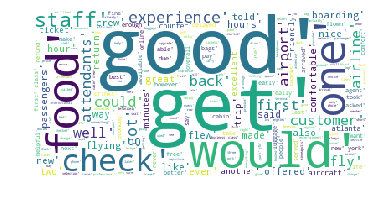

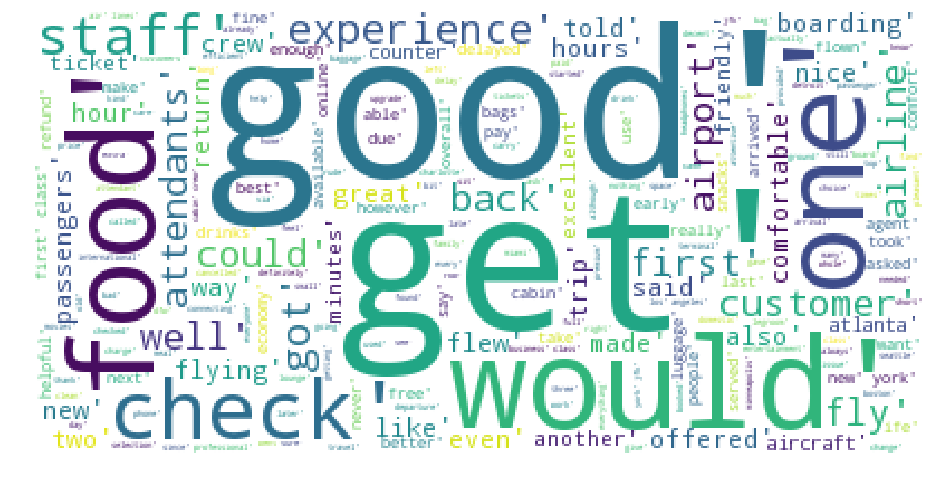

In [47]:
text = str(cleaned_positive_review_tokens)

# Generate a word cloud image
wc = WordCloud(background_color="white", max_words=2000).generate(text)
wc.generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wc)
plt.axis("off")

# take relative word frequencies into account, lower max_font_size
#wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
plt.figure(figsize=(16,16))
plt.imshow(wc)
plt.axis("off")
plt.savefig("data/pos.png")
plt.savefig("data/pos.pdf")
# Showing the top words into a word cloud

# Pattern

In [48]:
# remove all urls
documents = [re.sub(r"http\S+", '', document) for document in positive_reviewsp] 
# Remove useless numbers and alphanumerical words
documents = [re.sub("[^a-zA-Z]+", " ", document) for document in documents]
# tokenize
texts = [document.lower().split() for document in documents]
# remove common words 
stoplist = stopwords.words('english')
texts = [[word for word in text if word not in stoplist] for text in texts]
#remove short words
texts = [[ word for word in tokens if len(word) >= 3 ] for tokens in texts]

In [49]:
# count words in list
cleaned_positive_review_tokensp = [x for y in texts for x in y]
cleaned_positive_review_tokensp[:50]

['new',
 'level',
 'awful',
 'curiosity',
 'got',
 'better',
 'could',
 'delta',
 'bad',
 'everyone',
 'knew',
 'told',
 'trusted',
 'instinct',
 'clapped',
 'old',
 'clapped',
 'cabin',
 'design',
 'seat',
 'fair',
 'comfortable',
 'get',
 'good',
 'sleep',
 'dinner',
 'service',
 'happen',
 'enough',
 'beef',
 'cater',
 'needs',
 'business',
 'passengers',
 'sat',
 'seat',
 'surprised',
 'learn',
 'need',
 'sit',
 'captains',
 'side',
 'plane',
 'want',
 'get',
 'choice',
 'meal',
 'delta',
 'crew',
 'member']

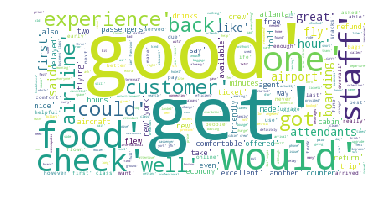

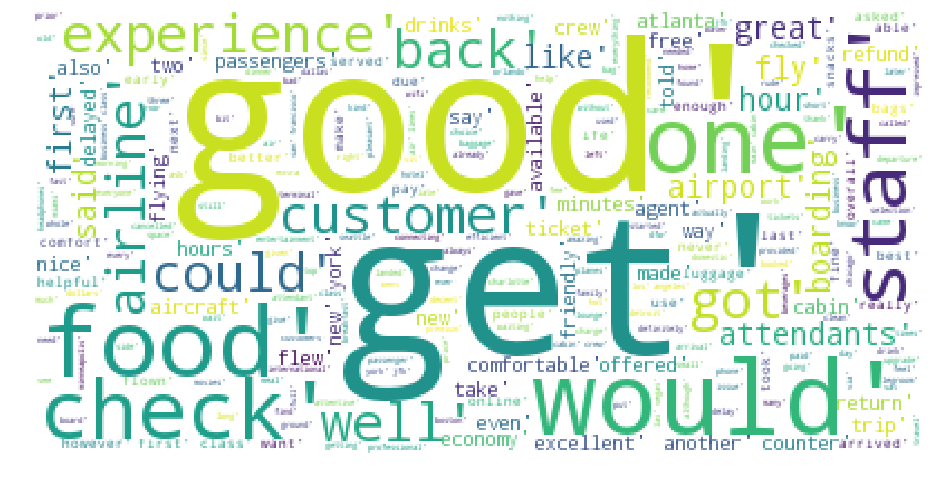

In [50]:
text = str(cleaned_positive_review_tokens)

# Generate a word cloud image
wc = WordCloud(background_color="white", max_words=2000).generate(text)
wc.generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wc)
plt.axis("off")

# take relative word frequencies into account, lower max_font_size
#wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
plt.figure(figsize=(16,16))
plt.imshow(wc)
plt.axis("off")
plt.savefig("data/pos.png")
plt.savefig("data/pos.pdf")

# Resources
### http://textblob.readthedocs.io/en/dev/quickstart.html
### https://www.clips.uantwerpen.be/pages/pattern-en